In [2]:
import histomicstk as htk

import numpy as np
import scipy as sp

import skimage.io
import skimage.measure
import skimage.color

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

stainColorMap = {
    'hematoxylin': [0.64, 0.72, 0.27],
    'eosin':       [0.09, 0.95, 0.28],
    'dab':         [0.27, 0.57, 0.78],
    'null':        [0.0, 0.0, 0.0]
}

# specify stains of input image
stain_1 = 'hematoxylin'   # nuclei stain
stain_2 = 'eosin'         # cytoplasm stain
stain_3 = 'null'          # set to null of input contains only two stains

# create stain matrix
W = np.array([stainColorMap[stain_1],
              stainColorMap[stain_2],
              stainColorMap[stain_3]]).T

In [6]:
import histomicstk as htk

import numpy as np
import scipy as sp

import skimage.io
import skimage.measure
import skimage.color

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams['image.cmap'] = 'gray'
titlesize = 24


In [7]:
inputImageFile = ('1_1.jpg')  # Easy1.png

imInput = skimage.io.imread(inputImageFile)[:, :, :3]

In [8]:
imInput.shape

(6216, 4213, 3)

In [9]:
refImageFile = ('https://data.kitware.com/api/v1/file/'
                '57718cc28d777f1ecd8a883c/download')  # L1.png

imReference = skimage.io.imread(refImageFile)[:, :, :3]
meanRef, stdRef = htk.preprocessing.color_conversion.lab_mean_std(imReference)

# perform reinhard color normalization
imNmzd = htk.preprocessing.color_normalization.reinhard(imInput, meanRef, stdRef)

In [10]:
stainColorMap = {
    'hematoxylin': [0.64, 0.72, 0.27],
    'eosin':       [0.09, 0.95, 0.28],
    'dab':         [0.27, 0.57, 0.78],
    'null':        [0.0, 0.0, 0.0]
}

# specify stains of input image
stain_1 = 'hematoxylin'   # nuclei stain
stain_2 = 'eosin'         # cytoplasm stain
stain_3 = 'null'          # set to null of input contains only two stains

# create stain matrix
W = np.array([stainColorMap[stain_1],
              stainColorMap[stain_2],
              stainColorMap[stain_3]]).T

# perform standard color deconvolution
imDeconvolved = htk.preprocessing.color_deconvolution.color_convolution(imNmzd, W)

# get nuclei/hematoxylin channel
imNucleiStain = imDeconvolved[:, :, 0]


In [11]:
foreground_threshold = 160

imFgndMask = sp.ndimage.morphology.binary_fill_holes(
    imNucleiStain < foreground_threshold)

# run adaptive multi-scale LoG filter
min_radius = 3
max_radius = 15

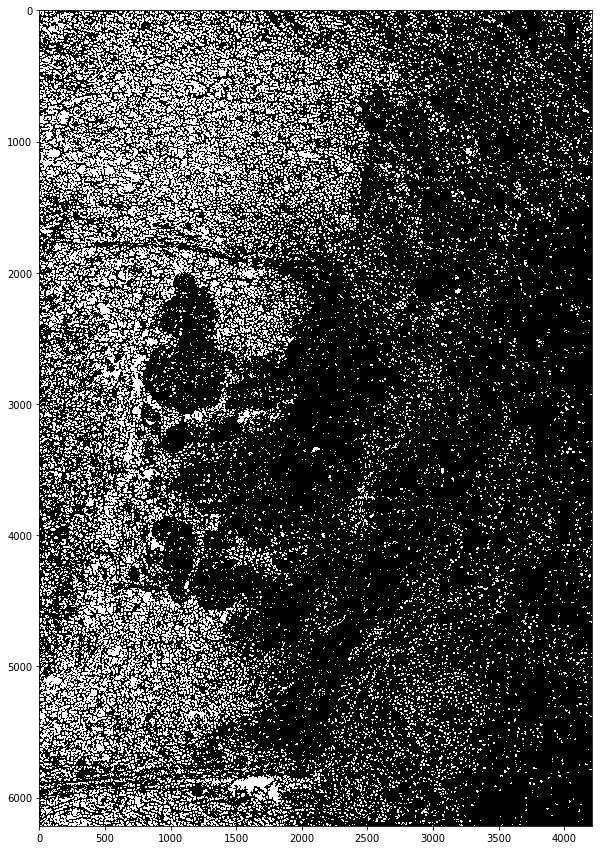

In [12]:
plt.figure()
plt.imshow(imNmzd)
plt.show()

In [15]:
min_radius = 3
max_radius = 15

imLog = htk.filters.shape.clog(imNucleiStain, imFgndMask,
                               sigma_min=min_radius * np.sqrt(2),
                               sigma_max=max_radius * np.sqrt(2))#????

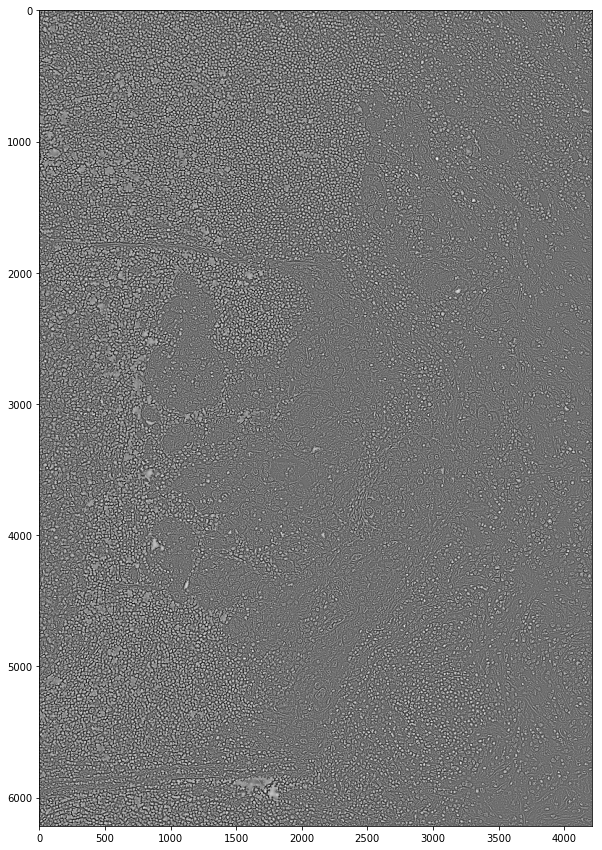

In [18]:
plt.figure()
plt.imshow(imLog[0])
plt.show()

In [19]:
local_max_search_radius = 5

imNucleiSegMask, Seeds, Max = htk.segmentation.nuclear.max_clustering(
    imLog[0], imFgndMask, local_max_search_radius)

# filter out small objects
min_nucleus_area = 80

imNucleiSegMask = htk.segmentation.label.area_open(
    imNucleiSegMask, min_nucleus_area).astype(np.int)

# compute nuclei properties
objProps = skimage.measure.regionprops(imNucleiSegMask)



In [25]:
for i in range(0,15):
    for j in range (0,4):
        print objProps[i].bbox[j]

0
75
19
103
0
125
13
146
0
150
12
175
0
275
9
293
0
301
17
330
0
419
11
442
0
442
11
465
0
649
14
669
0
763
18
779
0
813
12
849
0
861
11
887
0
977
13
999
0
1056
17
1087
0
1136
13
1159
0
1157
9
1180
